# 随机梯度下降法

对于每一次更新参数，不必遍历所有的训练集合，仅仅使用了一个数据，来变换一个参数。这样做不如完全梯度下降的精确度高，可能会走很多弯路，但整体趋势是走向minmum。

这样做可以节省更多的时间，算法更快

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

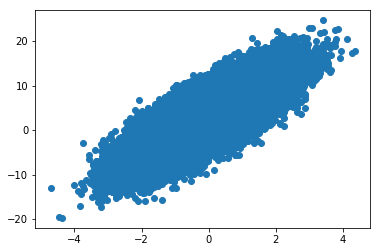

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

In [5]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

CPU times: user 1.1 s, sys: 51.7 ms, total: 1.15 s
Wall time: 1.01 s


In [6]:
theta

array([ 2.99779067,  4.01198115])

In [7]:
def dJ_sgd(theta, X_b_i, y_i):
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

def sgd(X_b, y, initial_theta, n_iters):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [8]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m//3)

CPU times: user 298 ms, sys: 4.09 ms, total: 302 ms
Wall time: 315 ms


In [9]:
theta

array([ 3.06779865,  4.04280985])

# sklearn 中的随机梯度下降法

In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 666)

In [26]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [27]:
sgd_reg = SGDRegressor(max_iter=100)
sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

0.81300302058622109